In [1]:
import zipfile

zip_path = "/content/archive (5).zip"
print(zipfile.is_zipfile(zip_path))


True


In [2]:
import zipfile, os

zip_path = "/content/archive (5).zip"
extract_path = "/content/dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(os.listdir("/content/dataset"))
print(os.listdir("/content/dataset/Training"))
print(os.listdir("/content/dataset/Testing"))


['Training', 'Testing']
['notumor', 'glioma', 'meningioma', 'pituitary']
['notumor', 'glioma', 'meningioma', 'pituitary']


In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.efficientnet import EfficientNetB0, preprocess_input
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


In [4]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=15,
    zoom_range=0.1,
    horizontal_flip=True
)

test_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)


In [5]:
train_data = train_gen.flow_from_directory(
    "/content/dataset/Training",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

test_data = test_gen.flow_from_directory(
    "/content/dataset/Testing",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)


Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [6]:
base_model = EfficientNetB0(
    weights="imagenet",
    include_top=False,
    input_shape=(224, 224, 3)
)

base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
output = Dense(4, activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=output)


In [7]:
model.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)


In [8]:
EPOCHS = 10

history = model.fit(
    train_data,
    validation_data=test_data,
    epochs=EPOCHS
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 138s 612ms/step - accuracy: 0.5730 - loss: 0.9975 - val_accuracy: 0.7460 - val_loss: 0.6280
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 78s 432ms/step - accuracy: 0.8237 - loss: 0.4992 - val_accuracy: 0.8009 - val_loss: 0.4919
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 75s 421ms/step - accuracy: 0.8393 - loss: 0.4405 - val_accuracy: 0.8093 - val_loss: 0.4842
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 75s 419ms/step - accuracy: 0.8535 - loss: 0.4075 - val_accuracy: 0.8398 - val_loss: 0.4054
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 75s 421ms/step - accuracy: 0.8548 - loss: 0.3886 - val_accuracy: 0.8246 - val_loss: 0.4172
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 77s 428ms/step - accuracy: 0.8579 - loss: 0.3763 - val_accuracy: 0.8436 - val_loss: 0.3905
Epoch 7/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 76s 425ms/step - accuracy: 0.8774 - loss: 0.3460 - val_accuracy: 0.8474 - val_loss: 0.3778
Epoch 8/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 75s 422ms/step - accuracy: 0.8727 - loss: 

In [9]:
base_model.trainable = True

for layer in base_model.layers[:-30]:
    layer.trainable = False


In [10]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)


In [11]:
EPOCHS_FINE = 10

history_fine = model.fit(
    train_data,
    validation_data=test_data,
    epochs=EPOCHS_FINE
)


Epoch 1/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 132s 571ms/step - accuracy: 0.8278 - loss: 0.4692 - val_accuracy: 0.8917 - val_loss: 0.2635
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 77s 431ms/step - accuracy: 0.8983 - loss: 0.2649 - val_accuracy: 0.9161 - val_loss: 0.2167
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 77s 428ms/step - accuracy: 0.9221 - loss: 0.2079 - val_accuracy: 0.9413 - val_loss: 0.1618
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 79s 440ms/step - accuracy: 0.9306 - loss: 0.1791 - val_accuracy: 0.9512 - val_loss: 0.1343
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 78s 433ms/step - accuracy: 0.9407 - loss: 0.1563 - val_accuracy: 0.9489 - val_loss: 0.1316
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 77s 428ms/step - accuracy: 0.9604 - loss: 0.1203 - val_accuracy: 0.9611 - val_loss: 0.1076
Epoch 7/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 76s 426ms/step - accuracy: 0.9655 - loss: 0.1026 - val_accuracy: 0.9748 - val_loss: 0.0837
Epoch 8/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 76s 426ms/step - accuracy: 0.9682 - loss: 

In [12]:
loss, accuracy = model.evaluate(test_data)
print(f"Final Test Accuracy: {accuracy*100:.2f}%")


41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - accuracy: 0.9738 - loss: 0.0923
Final Test Accuracy: 98.02%


41/41 ━━━━━━━━━━━━━━━━━━━━ 27s 336ms/step


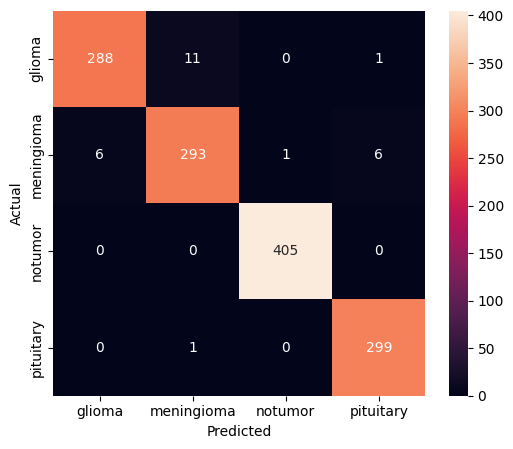

              precision    recall  f1-score   support

      glioma       0.98      0.96      0.97       300
  meningioma       0.96      0.96      0.96       306
     notumor       1.00      1.00      1.00       405
   pituitary       0.98      1.00      0.99       300

    accuracy                           0.98      1311
   macro avg       0.98      0.98      0.98      1311
weighted avg       0.98      0.98      0.98      1311



In [13]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

y_true = test_data.classes
y_pred = np.argmax(model.predict(test_data), axis=1)

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d",
            xticklabels=test_data.class_indices.keys(),
            yticklabels=test_data.class_indices.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(classification_report(y_true, y_pred,
      target_names=test_data.class_indices.keys()))


In [14]:
model.save("brain_tumor_cnn_98_percent.h5")


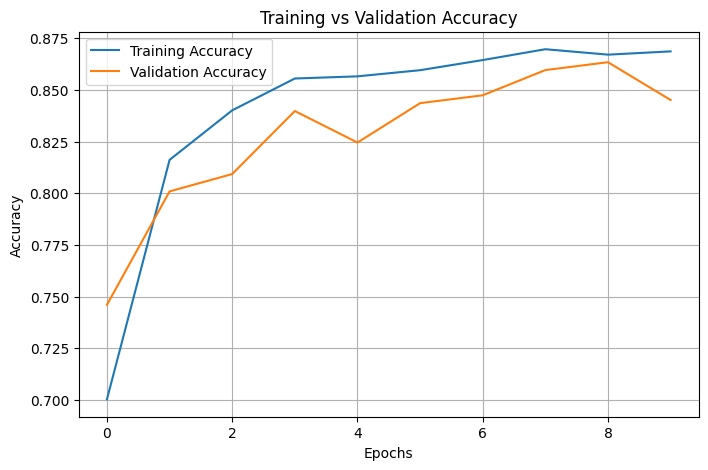

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()


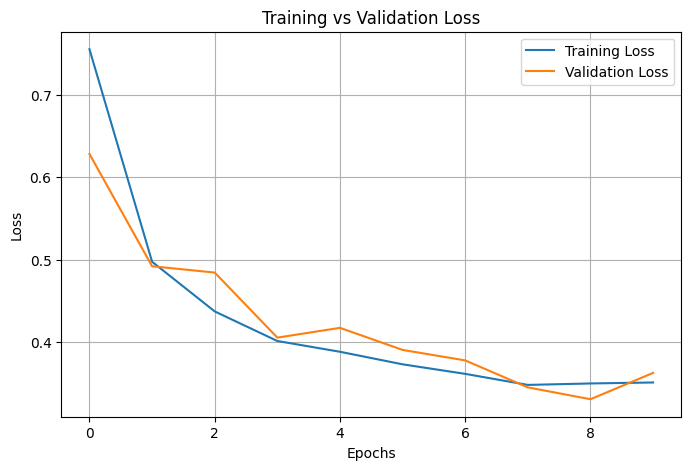

In [16]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()
